# Лабораторная работа по заданию №  6. Алгоритмы на графах. Алгоритмы поиска пути на взвешенных графах

In [55]:
import numpy as np
import networkx as nx
import random
import sys
import time
import matplotlib.pyplot as plt
#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=100)

## Генерация графа со случайным присвоением весов

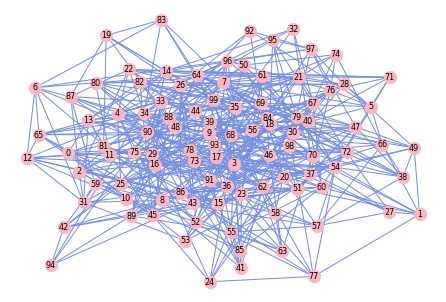

In [56]:
G=nx.generators.random_graphs.gnm_random_graph(100, 500, 25)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)
nx.draw(G, node_size=150,  with_labels=True, node_color='#FFB6C1', width=1, edge_color='#748EE1', font_size=8)

In [57]:
adjacency_matrix=nx.to_numpy_matrix(G)
print(adjacency_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
node_1=random.randint(0, 99)
node_2=random.randint(0, 99)
print("Node 1:"+str(node_1))
print("Node 2:"+str(node_2))

Node 1:68
Node 2:80


## Кратчайшее расстояние: алгоритм Дийкстры

In [59]:
res_time=0
for i in range (10):
    start_time = time.time()
    path_length=nx.dijkstra_path_length(G,node_1,node_2)
    current_time=time.time() - start_time
    print("Current time: "+str('{:0.9f}'.format(current_time)))
    res_time=res_time+current_time
print("Mean time: "+str('{:0.9f}'.format(res_time/10)))
print("Path length: "+str(path_length))
print("Path:")
print(nx.dijkstra_path(G,node_1,node_2))

Current time: 0.000563622
Current time: 0.000506878
Current time: 0.000401974
Current time: 0.000306606
Current time: 0.000301838
Current time: 0.000301123
Current time: 0.000323296
Current time: 0.000284195
Current time: 0.000241995
Current time: 0.000241756
Mean time: 0.000347328
Path length: 3
Path:
[68, 83, 6, 52, 61, 80]


## Кратчайшее расстояние: алгоритм Беллмана-Форда

In [60]:
res_time=0
for i in range (10):
    start_time = time.time()
    length, path = nx.single_source_bellman_ford(G, node_1, node_2)
    current_time=time.time() - start_time
    print("Current time: "+str('{:0.9f}'.format(current_time)))
    res_time=res_time+current_time
print("Mean time: "+str('{:0.9f}'.format(res_time/10)))
print("Path length: "+str(length))
print("Path:")
print(path)

Current time: 0.003268003
Current time: 0.003149271
Current time: 0.002988338
Current time: 0.003158808
Current time: 0.003375769
Current time: 0.003765345
Current time: 0.001919746
Current time: 0.001698494
Current time: 0.001651525
Current time: 0.001676559
Mean time: 0.002665186
Path length: 3
Path:
[68, 83, 6, 52, 61, 80]


## Поиск кратчайшего пути с помощью алгоритма A* 

### Генерация сетки с препятствиями

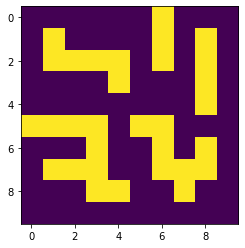

In [61]:
grid=np.array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
              [0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
              [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
              [0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
plt.imshow(grid)

### Приведение матрицы к графу, присвоение весов ребрам, ведущим к препятствиям

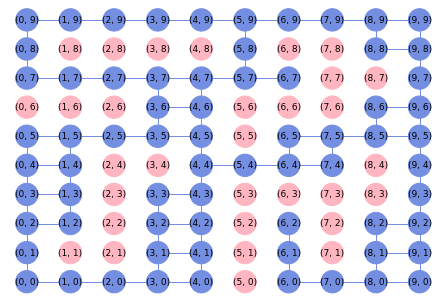

In [62]:
G = nx.grid_2d_graph(10, 10)

def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

obstacles_list=np.argwhere(grid == 1).tolist()
for (u, v) in G.edges():
    if list(v) in obstacles_list or list(u) in obstacles_list:        
        G.edges[u,v]['weight'] = 100000
        G.edges[u,v]['color'] = 'w'
    else:
        G.edges[u,v]['weight'] = 0
        G.edges[u,v]['color'] = '#748EE1'
adjacency_matrix=nx.to_numpy_matrix(G)
pos = dict( (n, n)  for n in G.nodes() )
color_map = []
for node in G:
    if list(node) in obstacles_list:
        color_map.append('#FFB6C1')
    else: 
        color_map.append('#748EE1')
        
colors = [G[u][v]['color'] for u,v in G.edges()]        
nx.draw(G, pos, node_size=500,  with_labels=True, node_color=color_map, width=1, edge_color=colors, font_size=9)

### Определение функции рассчитывающей и отрисовывающей кратчайший путь из указанных вершин

In [63]:
def astar_path_finding(G,start,end,dist):
    shortest_path=nx.astar_path(G,start,end,dist)
    print('Shortest path:')
    print(shortest_path)
    edges_path=[]
    for i in range (len(shortest_path)-1):
        edges_path.append((shortest_path[i], shortest_path[i+1]))
    
    color_map = []
    for node in G:
        if node==start or node==end:
            color_map.append('#FF1D7A')  
        elif node in shortest_path:
            color_map.append('#4057FF')
        elif list(node) in obstacles_list:
            color_map.append('#FFB6C1')
        else: 
            color_map.append('#748EE1')

    e_color_map = []
    for edge in G.edges():
        if edge in edges_path or (edge[1], edge[0]) in edges_path:
            e_color_map.append('#FF1D7A')
        else:
            e_color_map.append('w')

    nx.draw(G, pos, node_size=500,  with_labels=True, node_color=color_map, width=4, edge_color= e_color_map, font_size=9)

### Эксперименты с различными начальными и конечными вршинами

Shortest path:
[(4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (6, 4), (7, 4), (7, 5), (8, 5), (9, 5), (9, 4), (9, 3), (9, 2), (8, 2), (8, 1), (8, 0), (7, 0), (6, 0)]


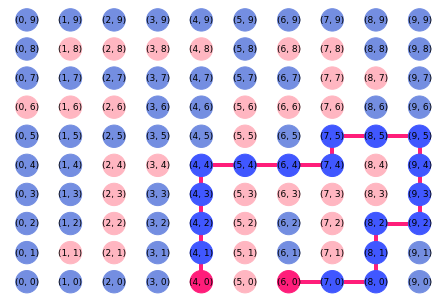

In [64]:
start=(4,0)
end=(6,0)
astar_path_finding(G,start,end,dist)

Shortest path:
[(3, 7), (2, 7), (1, 7), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9)]


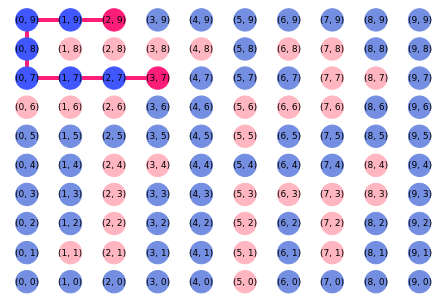

In [65]:
start=(3,7)
end=(2,9)
astar_path_finding(G,start,end,dist)

Shortest path:
[(3, 5), (3, 6), (3, 7), (2, 7), (1, 7), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9)]


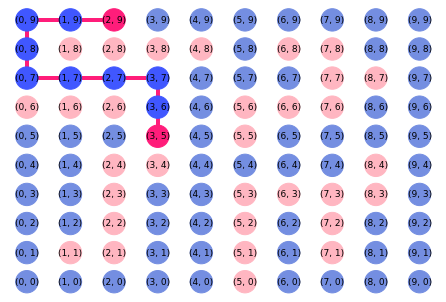

In [66]:
start=(3,5)
end=(2,9)
astar_path_finding(G,start,end,dist)

Shortest path:
[(3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9)]


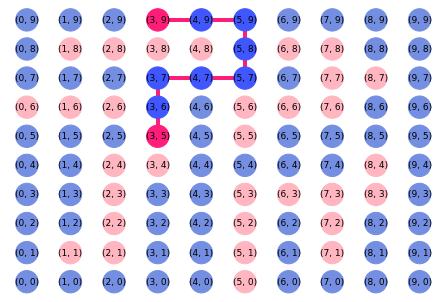

In [67]:
start=(3,5)
end=(3,9)
astar_path_finding(G,start,end,dist)

Shortest path:
[(8, 6), (9, 6), (9, 7), (9, 8), (8, 8), (8, 9), (7, 9), (6, 9), (5, 9), (5, 8), (5, 7), (6, 7)]


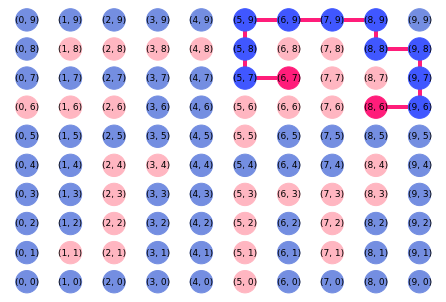

In [68]:
start=(8,6)
end=(6,7)
astar_path_finding(G,start,end,dist)

Shortest path:
[(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (5, 8), (5, 7), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (3, 3), (3, 2), (3, 1), (3, 0), (2, 0), (1, 0), (0, 0)]


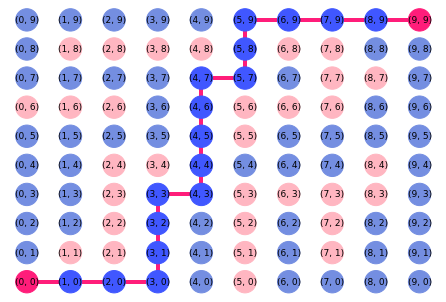

In [69]:
start=(9,9)
end=(0,0)
astar_path_finding(G,start,end,dist)